In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.float_format', '{:.0f}'.format)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\amirt\OneDrive\Documents\Projects\Marketing\Banking Case - Data.xlsx")

In [3]:
excel_file = pd.ExcelFile(r'C:\Users\amirt\OneDrive\Documents\Projects\Marketing\Banking Case - Data.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = excel_file.sheet_names

# Create a dictionary to store DataFrames
dataframes = {sheet_name: excel_file.parse(sheet_name) for sheet_name in sheet_names}

for sheet_name, df in dataframes.items():
    print(sheet_name)

Data Dictionary
Transaction Data
Customer Demographics


In [4]:
df_transaction = dataframes['Transaction Data']
df_demo = dataframes['Customer Demographics']

In [5]:
df_transaction.head()

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,0,1001,no,2143,yes,no,NaN,261,1,2,0,unknown,no,351
1,1,1002,no,29,yes,no,unknown,151,1,2,0,unknown,no,326
2,2,1003,no,2,yes,yes,unknown,76,1,2,0,NaN,no,422
3,3,1004,no,1506,yes,no,unknown,92,1,2,0,unknown,no,113
4,4,1005,no,1,no,no,unknown,198,1,2,0,unknown,no,342


In [6]:
# Join the sheets using the id Customer_number
df = pd.merge(df_transaction,df_demo,on = "Customer_number")

In [7]:
df

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143,yes,no,NaN,261,1,2,0,unknown,no,351,58,management,married,tertiary,839368,M
1,1,1002,no,29,yes,no,unknown,151,1,2,0,unknown,no,326,44,technician,single,secondary,1452858,M
2,2,1003,no,2,yes,yes,unknown,76,1,2,0,NaN,no,422,33,entrepreneur,married,NaN,4851383,F
3,3,1004,no,1506,yes,no,unknown,92,1,2,0,unknown,no,113,47,blue collar,married,unknown,3207754,F
4,4,1005,no,1,no,no,unknown,198,1,2,0,unknown,no,342,33,unknown,single,unknown,2562322,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,46207,no,825,no,no,cellular,0,0,-1,0,unknown,yes,152,51,technician,married,tertiary,2229818,M
45207,45207,46208,no,1729,no,no,cellular,0,0,-1,0,unknown,yes,334,121,retired,divorced,primary,2783556,M
45208,45208,46209,no,5715,no,no,cellular,1127,5,184,3,success,yes,381,72,retired,married,secondary,443512,M
45209,45209,46210,no,668,no,no,telephone,0,0,-1,0,unknown,no,211,57,blue-collar,married,secondary,4193684,F


In [8]:
df.describe()

,Sno,Customer_number,duration,campaign,last_contact_day,previous,Count_Txn,age
count,45211,45211,45172,45211,45211,45211,45210,45211
mean,22605,23606,258,3,42,1,300,41
std,13051,13051,258,3,99,2,116,11
min,0,1001,-167,0,-9,0,-423,18
25%,11302,12304,103,1,1,0,200,33
50%,22605,23606,180,2,1,0,300,39
75%,33908,34908,319,3,1,0,400,48
max,45210,46211,4918,63,871,275,499,121


In [9]:
df = df.drop(columns = ["Sno","Customer_number"],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Insurance         45211 non-null  object 
 1   balance           45156 non-null  object 
 2   housing           45211 non-null  object 
 3   loan              45203 non-null  object 
 4   contact           45168 non-null  object 
 5   duration          45172 non-null  float64
 6   campaign          45211 non-null  int64  
 7   last_contact_day  45211 non-null  int64  
 8   previous          45211 non-null  int64  
 9   poutcome          45196 non-null  object 
 10  Term Deposit      45203 non-null  object 
 11  Count_Txn         45210 non-null  float64
 12  age               45211 non-null  int64  
 13  job               45198 non-null  object 
 14  marital           45193 non-null  object 
 15  education         45190 non-null  object 
 16  Annual Income     45194 non-null  object

We can see that there is null values in Term Deposit which is our target values. So, lets remove the null rows

In [11]:
df = df.dropna(subset=['Term Deposit'])

In [12]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.sum()

Insurance          0
balance            0
housing            0
loan               0
contact            0
duration           0
campaign           0
last_contact_day   0
previous           0
poutcome           0
Term Deposit       0
Count_Txn          0
age                0
job                0
marital            0
education          0
Annual Income      0
Gender             0
dtype: float64

There are no duplicate rows

## Univariate analyis

### Categorical analysis

#### 1. Insurance

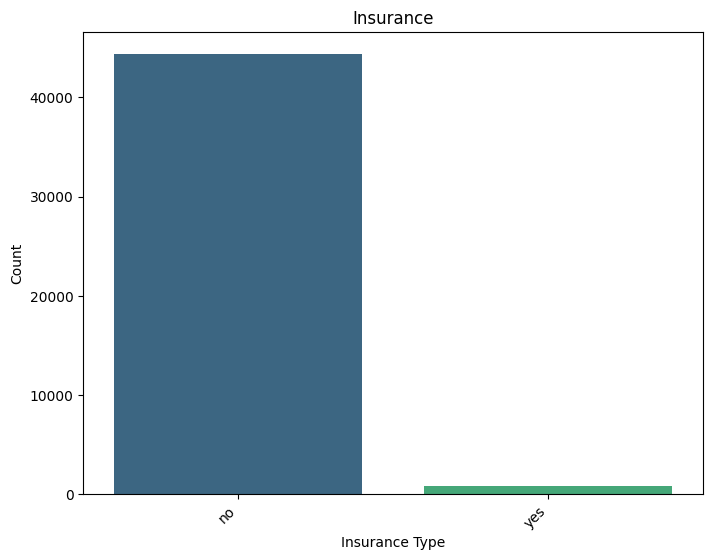

In [13]:
data = df['Insurance'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Only small number have took Insurance

#### 2. Housing

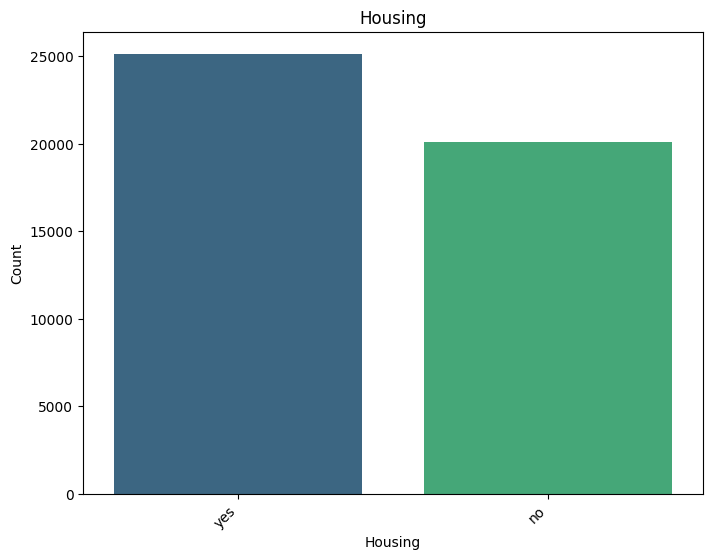

In [14]:
data = df['housing'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see more than half took housing loan

#### 3.Loan

In [15]:
df["loan"].isnull().sum()

8

In [16]:
df["loan"].value_counts()

no     37951
yes     7244
Name: loan, dtype: int64

In [17]:
df.loc[:,"loan"]=df["loan"].fillna("no")

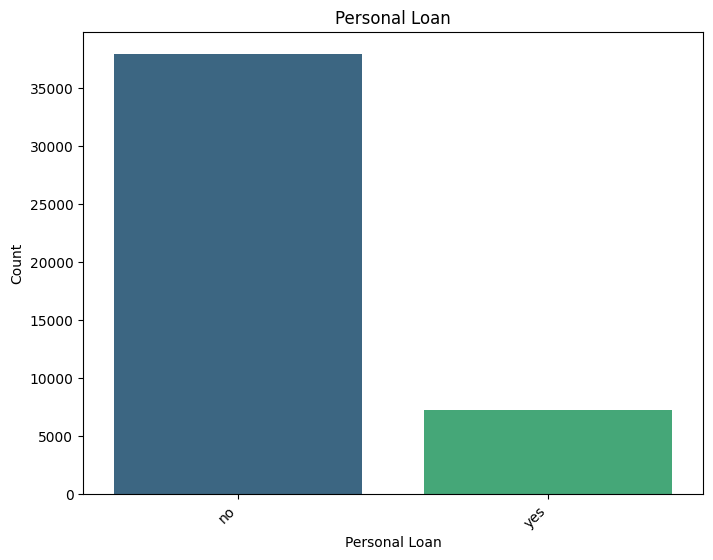

In [18]:
data = df['loan'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### 4.Contact

In [19]:
df["contact"].value_counts()

cellular     29282
unknown      12963
telephone     2850
Mobile          29
Tel             20
?               17
Name: contact, dtype: int64

In [20]:
df.loc[:,'contact'] = df['contact'].replace({'Mobile': 'cellular', 'Tel': 'telephone','?':'unknown'})

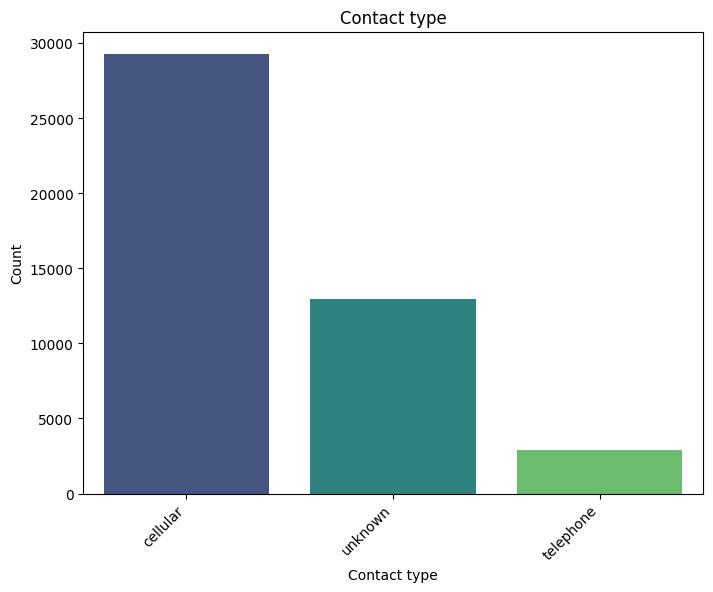

In [21]:
data = df['contact'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Contact type')
plt.xlabel('Contact type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Lets set the unknown values to mode that is cellular

In [22]:
col = "contact"
mode_value = df[col].mode()[0]
df[col] = df[col].replace('unknown', mode_value)
df.loc[:,'contact'] = df['contact'].fillna(mode_value)

#### 5. Poutcome

In [23]:
df["poutcome"].value_counts()

unknown    36876
failure     4901
other       1840
success     1511
pending       55
?              4
????           1
Name: poutcome, dtype: int64

In [24]:
df.loc[:,'poutcome'] = df['poutcome'].replace({'?': 'unknown', '????': 'unknown', 'pending': 'unknown'})

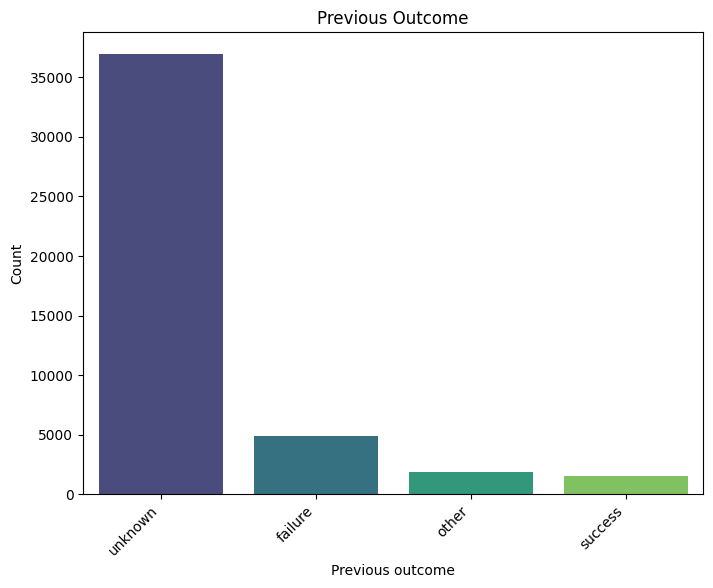

In [25]:
data = df['poutcome'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Previous Outcome')
plt.xlabel('Previous outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
col = "poutcome"
mode_value = df[col].mode()[0]
df[col] = df[col].replace('unknown', mode_value)
df.loc[:,col] = df[col].fillna(mode_value)

Only small customers have opened Term Deposit in the last Campaign

#### 6. Term Deposit - Target

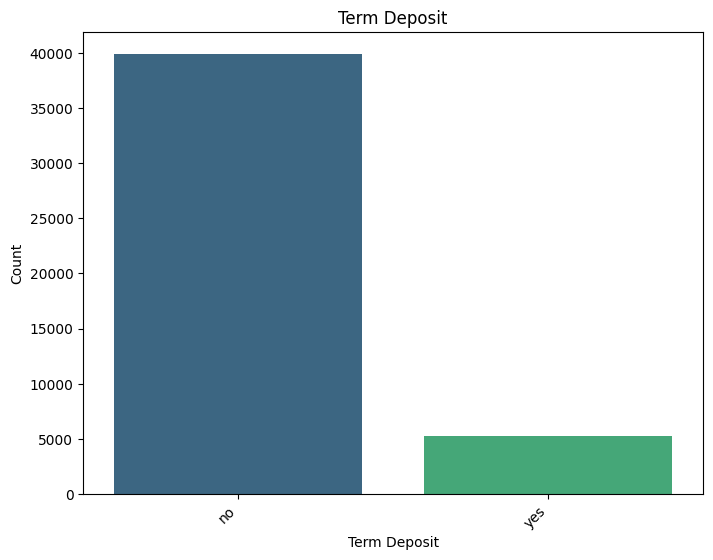

In [27]:
data = df['Term Deposit'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Term Deposit')
plt.xlabel('Term Deposit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Thus we should deal this as Imbalanced datasest

#### 7.Job

In [28]:
df["job"].value_counts()

blue-collar      9621
management       9454
technician       7593
admin.           5171
services         4150
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1302
housemaid        1240
student           938
unknown           288
blue collar       104
Name: job, dtype: int64

In [29]:
df.loc[:, 'job'] = df['job'].replace({'blue collar': 'blue-collar', '????': 'unknown'})

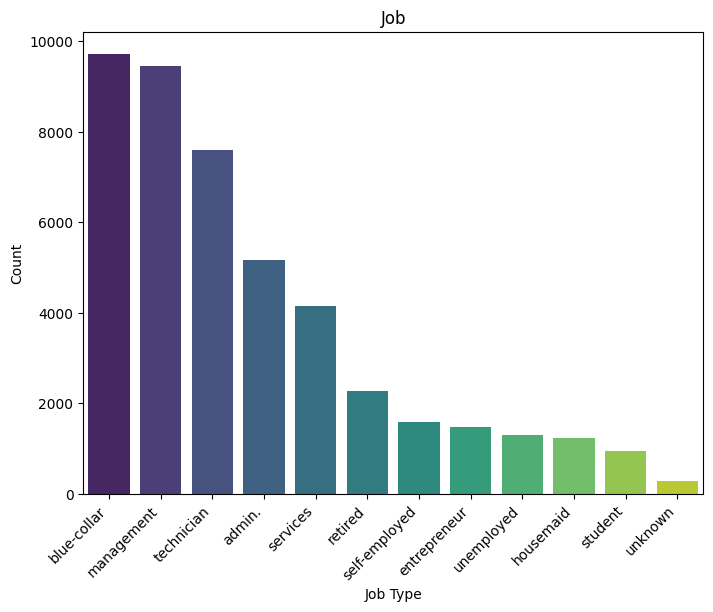

In [30]:
data = df['job'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Job')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
col = "job"
mode_value = df[col].mode()[0]
df[col] = df[col].replace('unknown', mode_value)
df.loc[:,col] = df[col].fillna(mode_value)

Blue-collar, management and technician consitue most of our customer base

#### 8. Marital status

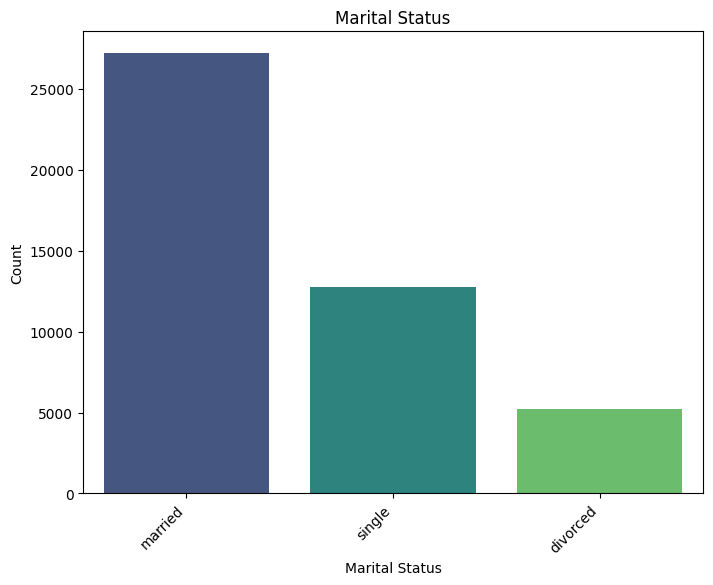

In [32]:
data = df['marital'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Most of our customers are married

In [33]:
mode_value = df[col].mode()[0]
df.loc[:,"marital"] = df['marital'].fillna(mode_value)

#### 9. Education

In [34]:
df["education"].value_counts()

secondary    23181
tertiary     13295
primary       6845
unknown       1856
Primary          3
ter tiary        2
Name: education, dtype: int64

In [35]:
df.loc[:,'education'] = df['education'].str.lower().str.strip().replace({'pri mary': 'primary','ter tiary': 'tertiary'})

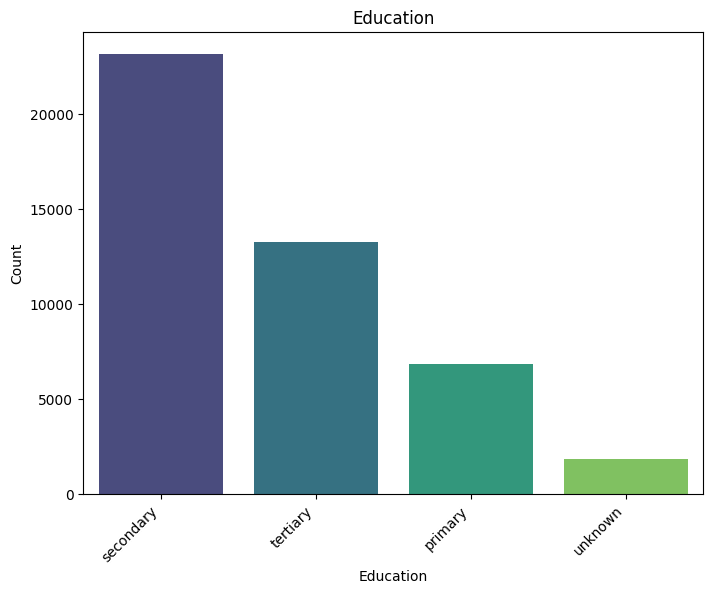

In [36]:
data = df['education'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
col = "education"
mode_value = df[col].mode()[0]
df[col] = df[col].replace('unknown', mode_value)
df.loc[:,col] = df[col].fillna(mode_value)

Our customers have mostly secondary and tertiary education

#### 10. Gender

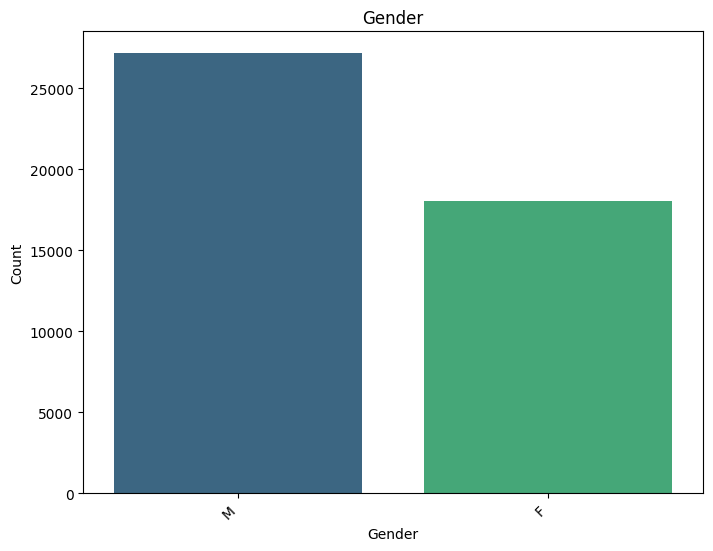

In [38]:
data = df['Gender'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Male customers count is greater than female

### Univariate Numerical analysis

In [39]:
df['Term Deposit']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Term Deposit, Length: 45203, dtype: object

#### 1. Balance

In [40]:
df.loc[:,'balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)

In [41]:
negative_balance_rows = df[df['balance'] < 0]
negative_balance_rows

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
44469,no,-32,no,yes,cellular,366,2,178,9,success,yes,366,35,admin.,single,secondary,212193,F
44541,no,-62,no,no,cellular,17,1,1,0,unknown,no,147,28,management,single,tertiary,211055,M
44566,no,-52,no,no,cellular,12,1,1,0,unknown,no,382,34,services,married,secondary,210478,M
44578,no,-280,no,no,cellular,6,1,1,0,unknown,no,100,36,entrepreneur,married,secondary,210026,M
44626,no,-205,no,no,cellular,481,1,579,1,failure,yes,353,31,services,single,secondary,208226,F


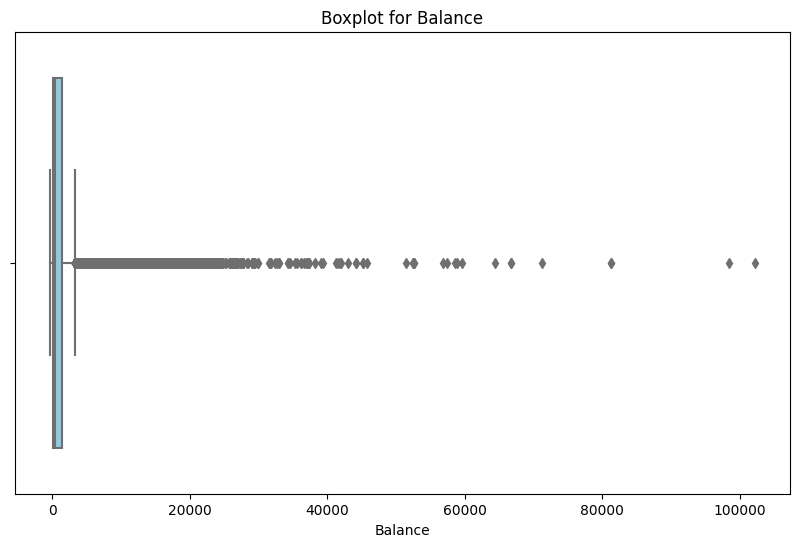

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='balance', data=df, color='skyblue')
plt.title('Boxplot for Balance')
plt.xlabel('Balance')
plt.show()

In [43]:
q1 = df["balance"].quantile(0.25)
q3 = df["balance"].quantile(0.75)
IQR = q3 - q1

# Defining max and min limits
max_limit = q3 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

df["balance"] = np.where(df["balance"] > max_limit, max_limit, 
                         np.where(df["balance"] < min_limit, min_limit, df["balance"]))

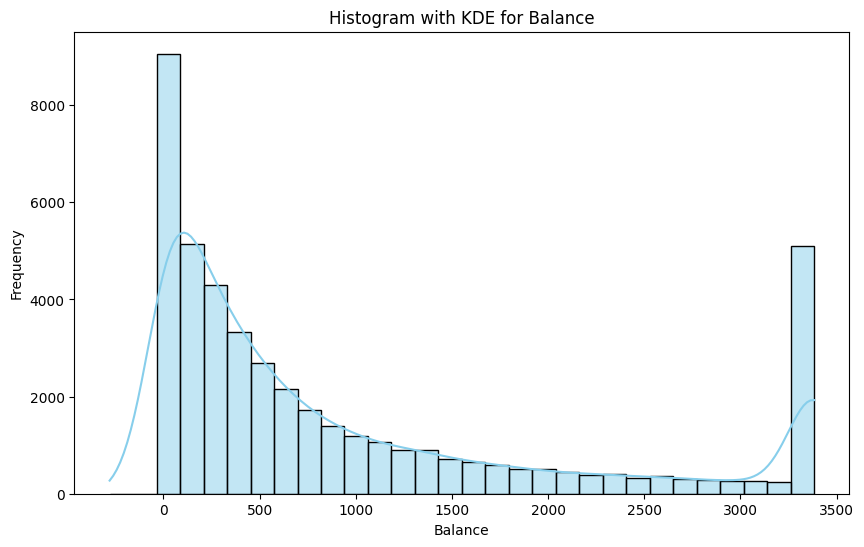

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, color='skyblue', bins=30)
plt.title('Histogram with KDE for Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Fill NaN values with 0 in the 'balance' column
df['balance'].fillna(0, inplace=True)

# Replace entire rows with 0 where 'balance' column contains '/' or '?'
df.loc[df['balance'].astype(str).str.contains(r'/|\?'), :] = 0

# Convert 'balance' column to integer
df['balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)

# Filter rows where 'balance' is equal to 0 or less than 0 and count the values
zero_balance_rows = df[(df['balance'] == 0) | (df['balance'] < 0)]['balance'].count()
zero_balance_rows

3600

We can see that 3600 accounts of 45211 has a balance of 0 and less than 0 in their accounts

In [46]:
df["balance"].describe()

count   45203
mean      977
std      1116
min      -280
25%       136
50%       484
75%      1435
max      3383
Name: balance, dtype: float64

In [47]:
df['balance'].isnull().sum()

0

#### 2. Duration

In [48]:
df["duration"].describe()

count   45164
mean      258
std       258
min      -167
25%       103
50%       180
75%       319
max      4918
Name: duration, dtype: float64

We can see that the duration contains negative values. The duration represents the call duration between agent and customer. It cant be 0. It must be a error. The - must be added by mistake so lets remove it.

In [49]:
df.loc[:,'duration'] = df['duration'].abs()

In [50]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  
duration_column = df['duration'].values.reshape(-1, 1)
df['duration'] = imputer.fit_transform(duration_column)
df['duration'] = df['duration'].round().astype(int)


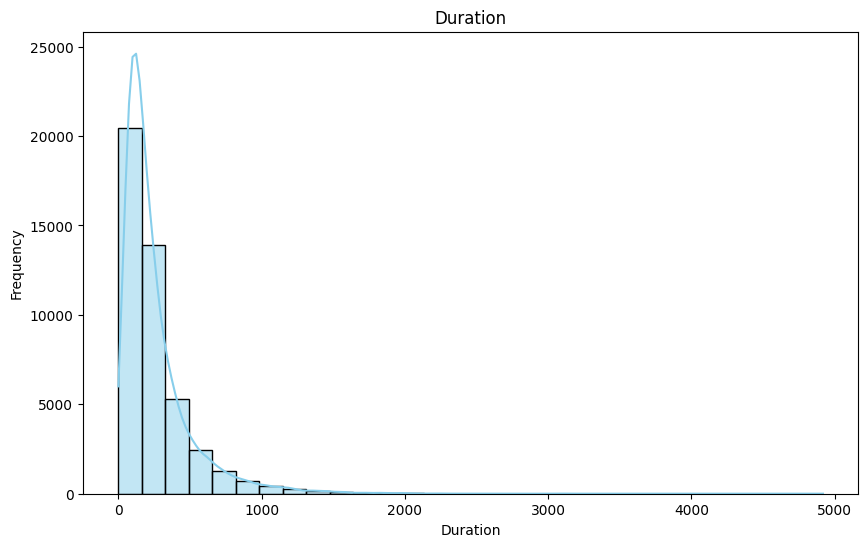

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True, color='skyblue', bins=30)
plt.title('Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [52]:
q1 = df["duration"].quantile(0.25)
q3 = df["duration"].quantile(0.75)
IQR = q3 - q1

# Defining max and min limits
max_limit = q3 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

df["duration"] = np.where(df["duration"] > max_limit, max_limit, 
                         np.where(df["duration"] < min_limit, min_limit, df["duration"]))

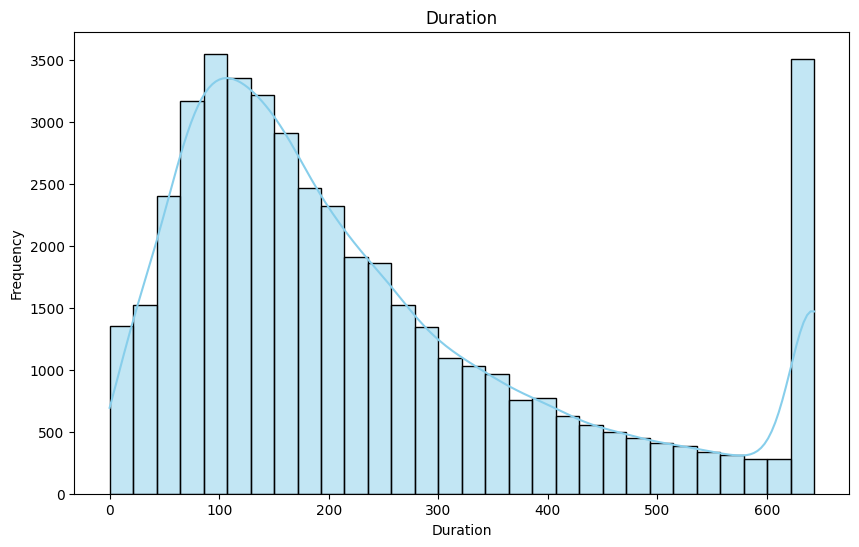

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True, color='skyblue', bins=30)
plt.title('Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

#### Campaign

In [54]:
df['campaign'].describe()

count   45203
mean        3
std         3
min         0
25%         1
50%         2
75%         3
max        63
Name: campaign, dtype: float64

We can see that maximum phone call made to a customer is 63.

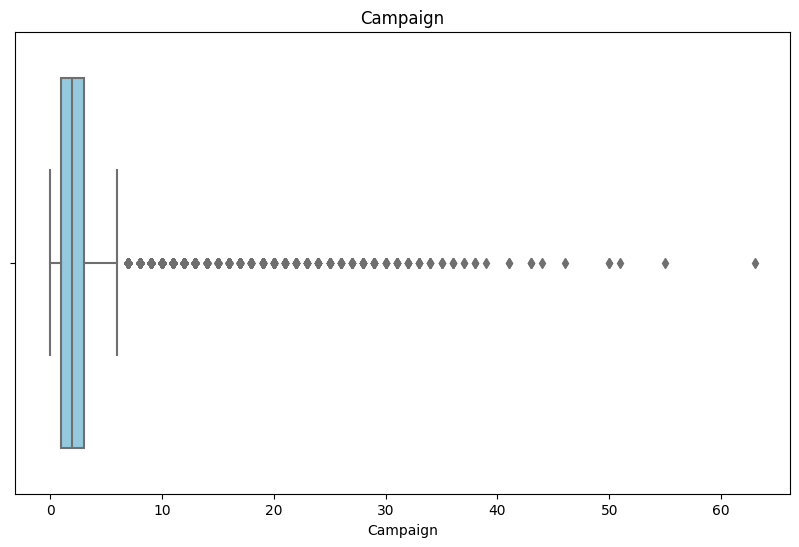

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='campaign', data=df, color='skyblue')
plt.title('Campaign')
plt.xlabel('Campaign')
plt.show()

#### Last Contact day

In [56]:
df['last_contact_day'].describe()

count   45203
mean       42
std        99
min        -9
25%         1
50%         1
75%         1
max       871
Name: last_contact_day, dtype: float64

Last contact day - Number of days that passed by after the client was last contacted from a previous campaign.
-1 implies the customer was not contacted. But we have -9 and so. Lets assume that they are errors and change to positive value other than -1.

In [57]:
df.loc[:,'last_contact_day'] = np.where(df['last_contact_day'] < -1, abs(df['last_contact_day']), df['last_contact_day'])

#### Previous - Number of contacts performed before this campaign and for this client 

In [58]:
df['previous'].describe()

count   45203
mean        1
std         2
min         0
25%         0
50%         0
75%         0
max       275
Name: previous, dtype: float64

In [59]:
df.loc[:,'previous'] = df['previous'].astype(int)

#### Count_txn : Number of Transactions Done by the customer

In [60]:
df['Count_Txn'].describe()

count   45202
mean      300
std       116
min      -423
25%       200
50%       300
75%       400
max       499
Name: Count_Txn, dtype: float64

The count cannot be negative. So, lets assume that they are typing errors and take absolute values

In [61]:
df.loc[:,'Count_Txn'] = df['Count_Txn'].abs()

In [62]:
df['Count_Txn'] = df['Count_Txn'].fillna(df['Count_Txn'].median())

In [63]:
df['Term Deposit']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Term Deposit, Length: 45203, dtype: object

## Dealing with outliers

In [64]:
import numpy as np

def cap_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        # Defining max and min limits
        max_limit = q3 + (1.5 * IQR)
        min_limit = q1 - (1.5 * IQR)

        # Cap outliers
        df[col] = np.where(df[col] > max_limit, max_limit,
                           np.where(df[col] < min_limit, min_limit, df[col]))

outlier_cols = ["last_contact_day", "previous", "Count_Txn"]
cap_outliers(df, outlier_cols)


#### Age

In [65]:
df['age'].describe()

count   45203
mean       41
std        11
min        18
25%        33
50%        39
75%        48
max       121
Name: age, dtype: float64

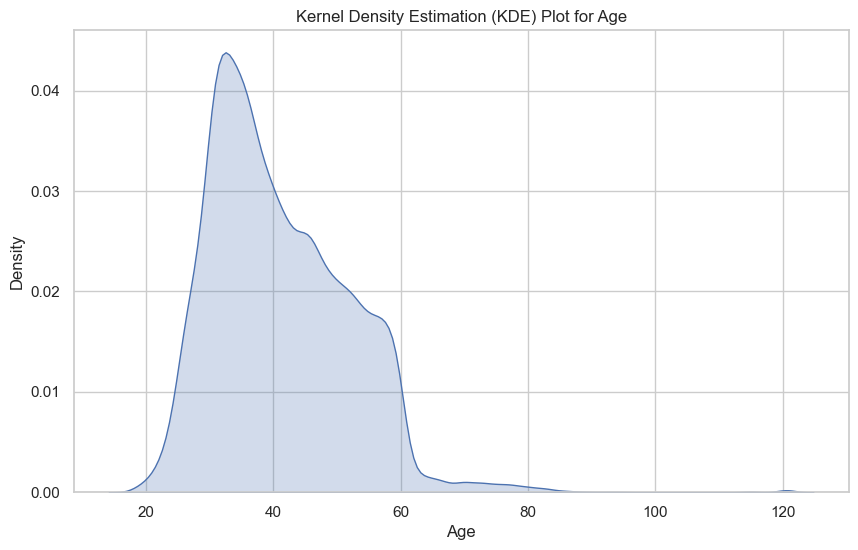

In [66]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create KDE plot for 'age' column
sns.kdeplot(data=df, x='age', fill=True, palette="crest")

plt.title('Kernel Density Estimation (KDE) Plot for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [67]:
# There seems to spike in the 120 so lets see what is the problem
top_ages = df['age'].nlargest(60)
top_ages

40789    121
40957    121
40972    121
41237    121
41242    121
41515    121
41599    121
41615    121
42197    121
42333    121
42747    121
42914    121
43142    121
43268    121
43915    121
44095    121
44932    121
45207    121
29464    120
31119    120
31919    120
33849    120
40622    120
41041    120
42025    120
42534    120
42864    120
43197    120
44396    120
44403    120
44786    120
45195    120
31723    115
32802    115
33710    115
33815    115
40383    115
40471    115
40526    115
40586    115
33699     95
41663     95
31233     94
44262     93
44420     93
41934     92
42727     92
31069     90
43194     90
41162     89
42574     89
44892     89
44669     88
44794     88
41923     87
42081     87
42494     87
42635     87
32105     86
41291     86
Name: age, dtype: int64

There seems to be logical mistake. It may be typing error it may be 21 typed as 121. so lets quick check. In middle east, the personal loan can be taken till 65. so lets check whether the unrealistic age customers has taken the loan, if so it may be typing error and lets cap it randomly to 75 to 95.

In [68]:
result_df = df[(df['age'] > 90) & (df['loan'] == 'yes') & (df['housing'] == 'yes')]
result_df

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender


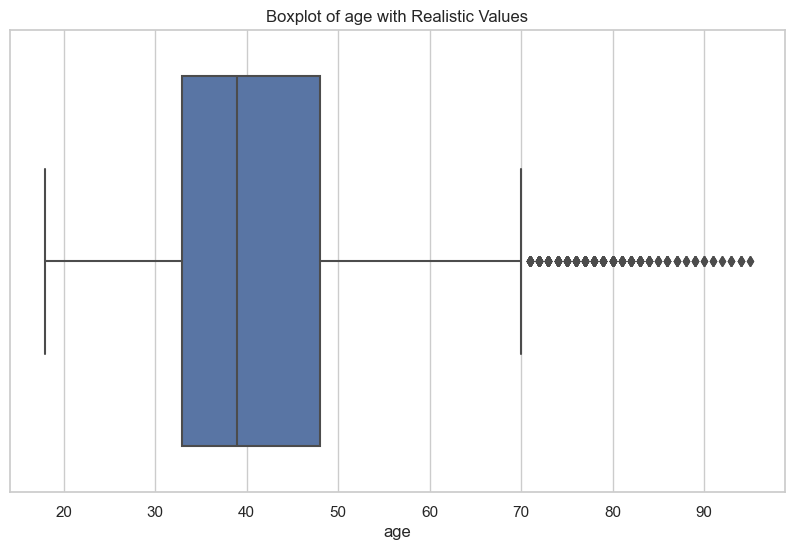

In [69]:
column_name = 'age'

# Set the upper limit for the more reasonable range
upper_limit = 95

# Identify and replace unrealistic values
unrealistic_values = df[df[column_name] > upper_limit][column_name]
df.loc[unrealistic_values.index, column_name] = np.random.randint(75, upper_limit, size=len(unrealistic_values))

# Create a boxplot to visualize the updated values
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot of {column_name} with Realistic Values')
plt.show()

#### Annual Income

In [70]:
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
non_numeric_values = df['Annual Income'][~df['Annual Income'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
df.loc[non_numeric_values.index, 'Annual Income'] = np.nan
df['Annual Income'] = df['Annual Income'].fillna(0).astype(int)


In [71]:
df["Annual Income"].describe()

count     45203
mean    2595388
std     1394016
min           0
25%     1385549
50%     2585180
75%     3802262
max     9458762
Name: Annual Income, dtype: float64

In [72]:
df['Annual Income'].isnull().sum()

0

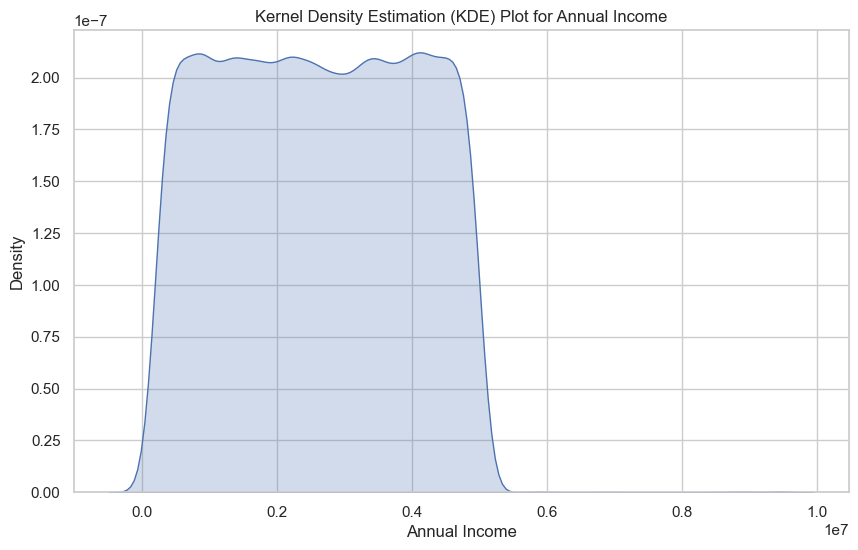

In [73]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create KDE plot for 'age' column
sns.kdeplot(data=df, x='Annual Income', fill=True, palette="crest")

plt.title('Kernel Density Estimation (KDE) Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()

In [74]:
df[df['Annual Income'] == 0].count()

Insurance           18
balance             18
housing             18
loan                18
contact             18
duration            18
campaign            18
last_contact_day    18
previous            18
poutcome            18
Term Deposit        18
Count_Txn           18
age                 18
job                 18
marital             18
education           18
Annual Income       18
Gender              18
dtype: int64

# Bivariate analysis

### Insurance vs Term Deposit

Lets see the relationship between Insurance and Term Deposit

In [75]:
pivot_table = pd.crosstab(df['Insurance'], df['Term Deposit'])
pivot_table

Term Deposit,no,yes
Insurance,,
no,39151,5237
yes,763,52


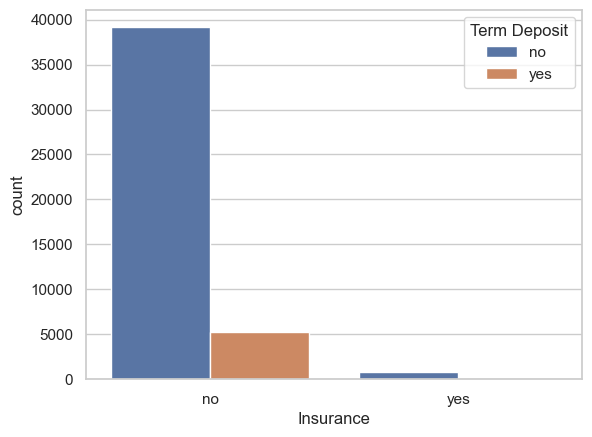

In [76]:
sns.countplot(x='Insurance', hue='Term Deposit', data=df)
plt.show()

The majority of customers do not have insurance and do not have a term deposit. there is a small number of people who have insurance but do not have a term deposit This suggests that there is a negative correlation between having insurance and having a term deposit, meaning that people who have insurance are less likely to have a term deposit, and vice versa

### Balance vs Term Deposit

In [77]:
pivot_table = df.pivot_table(index='Term Deposit', values='balance', aggfunc='median').reset_index()

# Display the pivot table
print("Pivot Table:")
print(pivot_table)

Pivot Table:
  Term Deposit  balance
0           no      458
1          yes      752


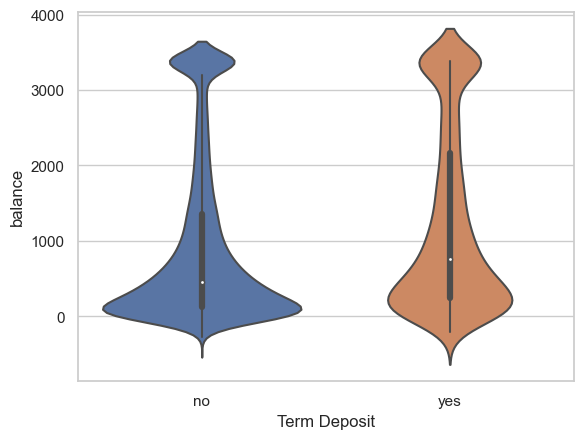

In [78]:
sns.violinplot(x='Term Deposit', y='balance', data=df)
plt.show()

### Age and Term Deposit

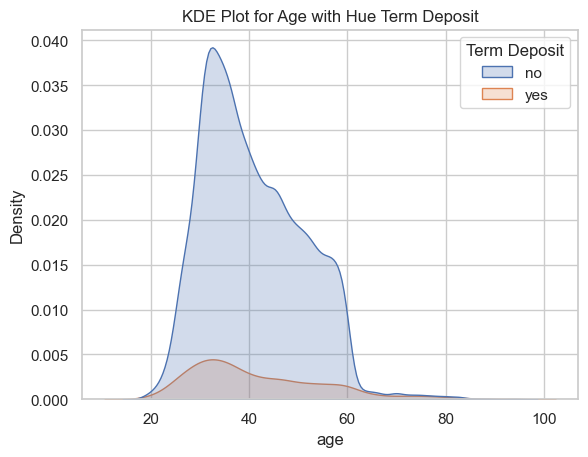

In [79]:
sns.kdeplot(x='age', hue='Term Deposit', data=df, fill=True)
plt.title('KDE Plot for Age with Hue Term Deposit')
plt.show()

As the age increases, people tend to have the term deposit increases. Lets take a threshold 65 and calculate percentage of people having term deposit.

In [80]:
threshold = 60
above_threshold = df[df['age'] >= threshold]
percentage_with_term_deposit = (above_threshold['Term Deposit'] == 'yes').mean() * 100
percentage_with_term_deposit

33.6322869955157

Thus 33 % of the people who are greater than 60 have a Term deposit

#### Job vs Term Deposit

In [81]:
crosstab_table_percentage = pd.crosstab(df['job'], df['Term Deposit'], normalize='index') * 100
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
job,,
admin.,88,12
blue-collar,93,7
entrepreneur,92,8
housemaid,91,9
management,86,14
retired,77,23
self-employed,88,12
services,91,9
student,71,29


This confirms our findings that oldage people tends to take Term Deposit. After Retired, next Students, admin and Unemployed people tends to take Term Deposit. People less likely to take Term Deposit are services.

#### Marital vs Term Deposit

In [82]:
crosstab_table_percentage = pd.crosstab(df['marital'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
marital,,
blue-collar,67,33
divorced,88,12
married,90,10
single,85,15


The single customers tend to take Term Deposit more likely

### Education vs Term Deposit

In [83]:
crosstab_table_percentage = pd.crosstab(df['education'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
education,,
primary,91,9
secondary,89,11
tertiary,85,15


**People with tertiary education tends to make Term Deposit**

### Gender vs Term Deposit

Both male and female are likely have same percentage to take a term deposit

In [84]:
crosstab_table_percentage = pd.crosstab(df['Gender'], df['Term Deposit'], normalize='index') * 100

# Display the cross-tabulation with percentages
print("Cross-Tabulation for Job and Term Deposit (in percentage):")
crosstab_table_percentage

Cross-Tabulation for Job and Term Deposit (in percentage):


Term Deposit,no,yes
Gender,,
F,88,12
M,89,11


Both male and female have the same chances of taking the term deposit

#### Duration vs Term Deposit

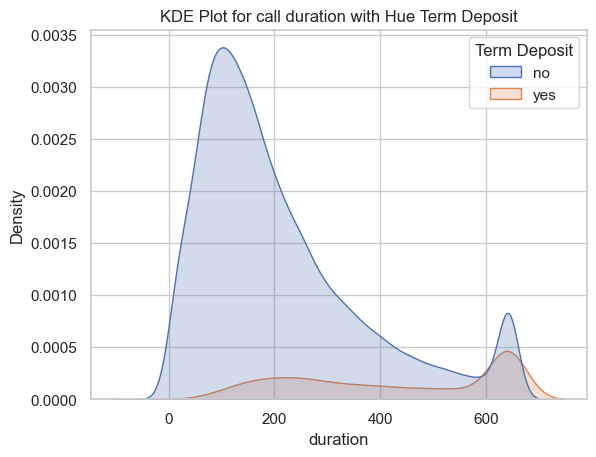

In [85]:
sns.kdeplot(x='duration', hue='Term Deposit', data=df, fill=True)
plt.title('KDE Plot for call duration with Hue Term Deposit')
plt.show()

In [86]:
pivot_table = df.pivot_table(index='Term Deposit', values='duration', aggfunc='median').reset_index()
pivot_table

,Term Deposit,duration
0,no,164
1,yes,426


**When we call them and tend to convience them to take a term deposit.it tend to be true**

In [87]:
df['Term Deposit']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Term Deposit, Length: 45203, dtype: object

### Previous outcome vs Current outcome

In [88]:
crosstab_table_percentage = pd.crosstab(df['poutcome'], df['Term Deposit'], normalize='index') * 100
crosstab_table_percentage

Term Deposit,no,yes
poutcome,,
failure,87,13
other,83,17
success,35,65
unknown,91,9


**The people who took Term Deposit are likely to continue in this campaign also.**

### Count_Txn vs Term Deposit

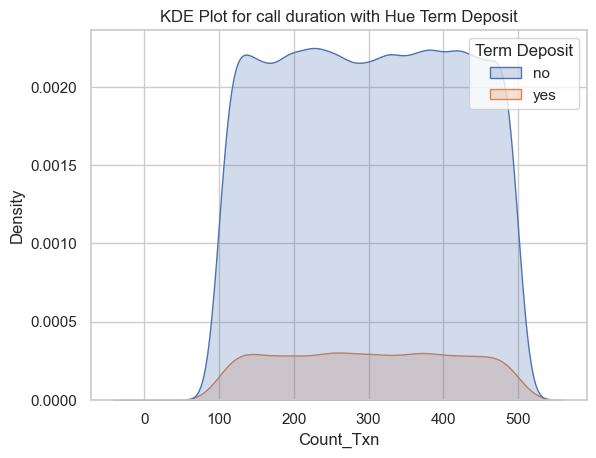

In [89]:
sns.kdeplot(x='Count_Txn', hue='Term Deposit', data=df, fill=True)
plt.title('KDE Plot for call duration with Hue Term Deposit')
plt.show()

In [90]:
pivot_table = df.pivot_table(index='Term Deposit', values='Count_Txn', aggfunc='median').reset_index()
pivot_table

,Term Deposit,Count_Txn
0,no,300
1,yes,298


The no of transaction doesnt have any effect on the term deposit marketing

# Analysis Questions

In [91]:
df['Term Deposit']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Term Deposit, Length: 45203, dtype: object

## 1. Income Insights:
#### How many customers have no annual income? Plot and present the data distribution of these customers.

In [92]:
df[df['Annual Income'] == 0].count()

Insurance           18
balance             18
housing             18
loan                18
contact             18
duration            18
campaign            18
last_contact_day    18
previous            18
poutcome            18
Term Deposit        18
Count_Txn           18
age                 18
job                 18
marital             18
education           18
Annual Income       18
Gender              18
dtype: int64

In [93]:
filtered_df = df[df['Annual Income'] == 0]
filtered_df

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
7,yes,2,yes,no,cellular,380,1,1,0,unknown,no,108,42,entrepreneur,divorced,tertiary,0,F
14,no,162,yes,no,cellular,174,1,1,0,unknown,no,186,57,services,married,secondary,0,M
23,no,50,yes,no,cellular,342,1,1,0,unknown,no,426,25,services,married,secondary,0,M
4993,no,170,yes,yes,cellular,492,1,1,0,unknown,no,469,28,admin.,married,secondary,0,M
5040,no,722,yes,no,cellular,150,1,1,0,unknown,no,405,28,blue-collar,single,primary,0,M
5335,no,2549,yes,no,cellular,246,3,1,0,unknown,no,413,32,blue-collar,married,secondary,0,F
5350,no,253,yes,no,cellular,160,2,1,0,unknown,no,418,30,blue-collar,married,secondary,0,M
5412,no,205,yes,no,cellular,147,14,1,0,unknown,no,293,35,blue-collar,married,secondary,0,F
5513,no,1049,yes,no,cellular,25,14,1,0,unknown,no,207,34,admin.,married,secondary,0,F
5565,no,97,yes,no,cellular,95,14,1,0,unknown,no,146,44,blue-collar,single,primary,0,M


Thus, 18 customers doesnt have a Annual Income. Lets find their distribution. The term blue-collar worker refers to individuals who engage in hard manual labor, typically in the agriculture, manufacturing, construction, mining, or maintenance sectors. Here most of the people who get 0 Annual Income is blue-collar workers

## 2. Loan-less Customers Profile:
#### Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?

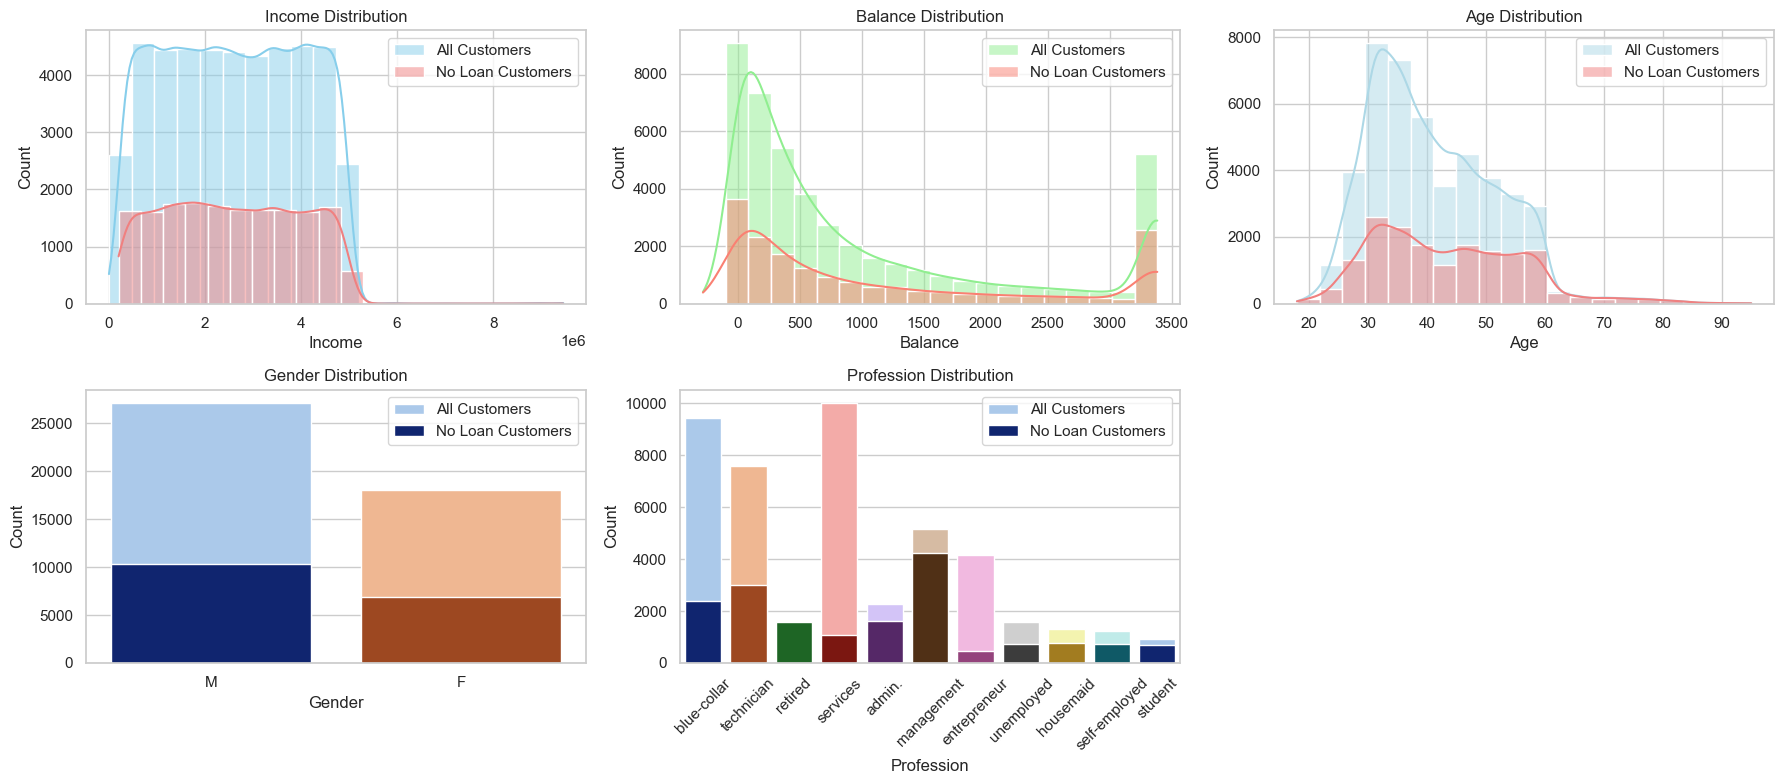

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter out customers with no loan
customers_no_loan = df[(df['loan'] == 'no') & (df['housing'] == 'no')]

# Step 2: Plot the distribution of Income, balance, age, gender, and profession for customers with no loan and others
plt.figure(figsize=(18, 8))

# Plot Income distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Annual Income'], bins=20, color='skyblue', kde=True, label='All Customers')
sns.histplot(customers_no_loan['Annual Income'], bins=20, color='lightcoral', kde=True, label='No Loan Customers')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()

# Plot balance distribution
plt.subplot(2, 3, 2)
sns.histplot(df['balance'], bins=20, color='lightgreen', kde=True, label='All Customers')
sns.histplot(customers_no_loan['balance'], bins=20, color='salmon', kde=True, label='No Loan Customers')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend()

# Plot age distribution
plt.subplot(2, 3, 3)
sns.histplot(df['age'], bins=20, color='lightblue', kde=True, label='All Customers')
sns.histplot(customers_no_loan['age'], bins=20, color='lightcoral', kde=True, label='No Loan Customers')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Plot gender distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Gender', data=df, palette='pastel', label='All Customers')
sns.countplot(x='Gender', data=customers_no_loan, palette='dark', label='No Loan Customers')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()

# Plot profession distribution
plt.subplot(2, 3, 5)
sns.countplot(x='job', data=df, palette='pastel', label='All Customers')
sns.countplot(x='job', data=customers_no_loan, palette='dark', label='No Loan Customers')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.tight_layout()
plt.show()

In [95]:
no_loan_customers = df[(df['loan'] == 'no') & (df['housing'] == 'no')]

# Calculate median salary for customers with no personal loan
median_salary_no_loan = no_loan_customers['Annual Income'].median()

# Calculate median salary for all customers
median_salary_all_customers = df['Annual Income'].median()

print(f"Median Salary for No Loan Customers: {median_salary_no_loan}")
print(f"Median Salary for All Customers: {median_salary_all_customers}")

Median Salary for No Loan Customers: 2562322.0
Median Salary for All Customers: 2585180.0


Ironically people with no loan have lower salary compared to others. People with management tend to not take loan

Since its difficult to get loan for retired, they consitute the most of population in no loan

## 4. Communication Strategy Insights:
#### Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.



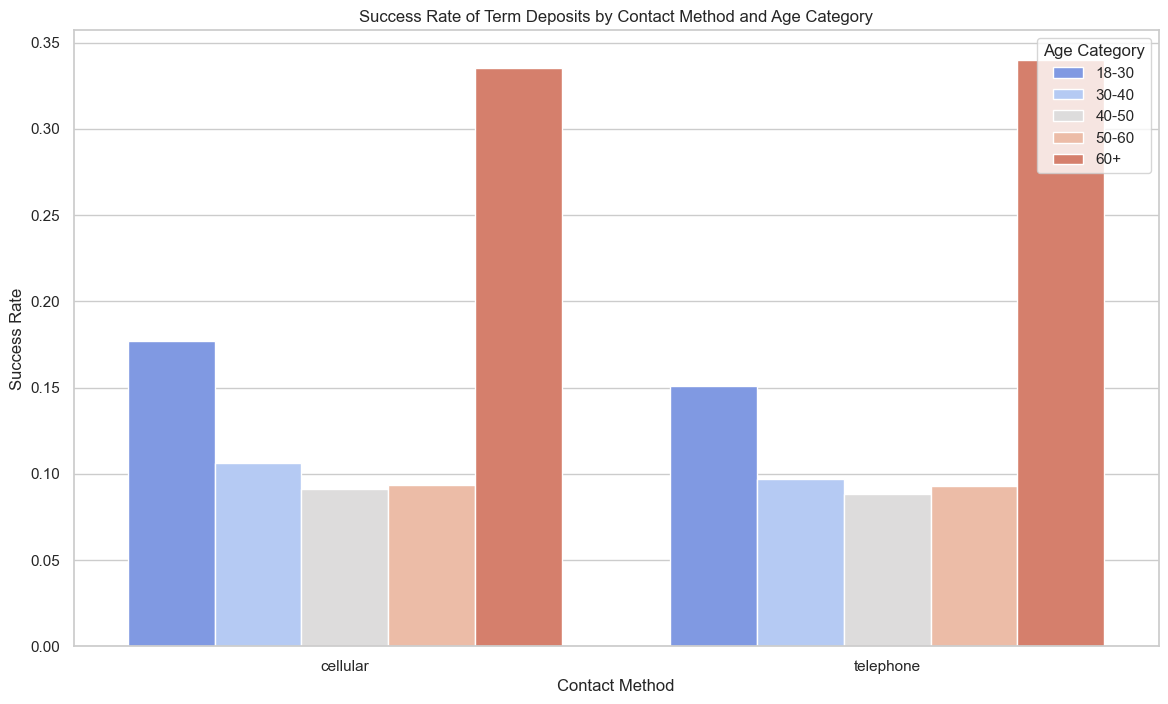

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['Term Deposit'] = df['Term Deposit'].map({'yes': 1, 'no': 0})

success_rate_by_contact_age = df.groupby(['contact', 'age_category'])['Term Deposit'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='contact', y='Term Deposit', hue='age_category', data=success_rate_by_contact_age, palette='coolwarm', ci=None)
plt.title('Success Rate of Term Deposits by Contact Method and Age Category')
plt.xlabel('Contact Method')
plt.ylabel('Success Rate')
plt.legend(title='Age Category', loc='upper right')
plt.show()

The best method to contact people to take term deposits has follows. It is advised to call using cellular to young people and middle age while the best method to contact elders are through the telephone

## 5. Age and Home Loans:
#### Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.


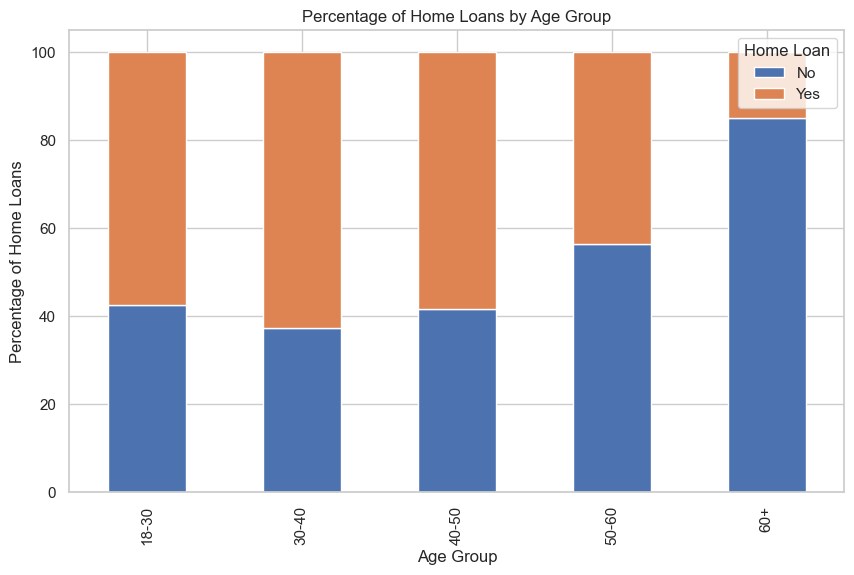

In [97]:
# Group by age group and calculate the percentage of home loans
age_group_percentage = df.groupby('age_category')['housing'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting
sns.set(style="whitegrid")
ax = age_group_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Percentage of Home Loans')
ax.set_xlabel('Age Group')
ax.set_title('Percentage of Home Loans by Age Group')
plt.legend(title='Home Loan', loc='upper right', labels=['No', 'Yes'])

plt.show()

We can see that Home loan is higher with younger people.

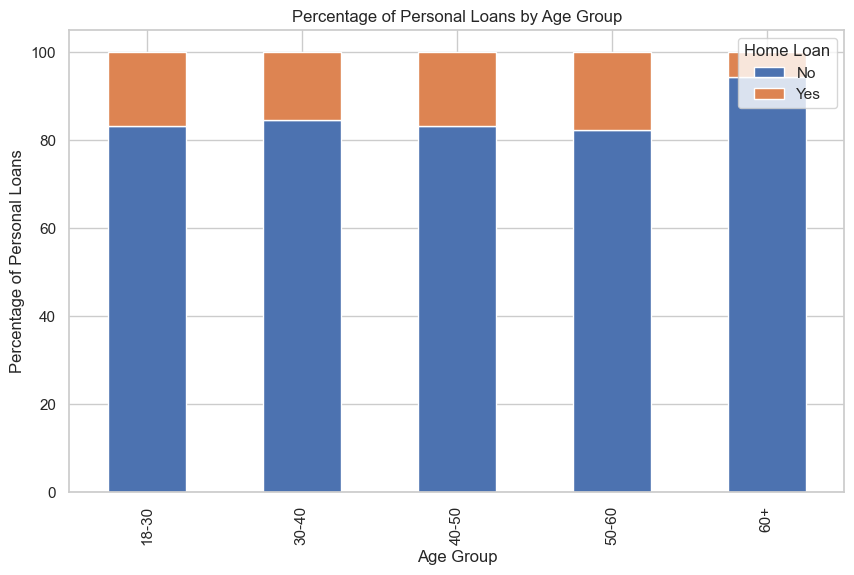

In [98]:
# Group by age group and calculate the percentage of home loans
age_group_percentage = df.groupby('age_category')['loan'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting
sns.set(style="whitegrid")
ax = age_group_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Percentage of Personal Loans')
ax.set_xlabel('Age Group')
ax.set_title('Percentage of Personal Loans by Age Group')
plt.legend(title='Home Loan', loc='upper right', labels=['No', 'Yes'])

plt.show()

Personal loans are lower than housing loan and it is significantly taken by younger customers

## 6. Income and Age Relationship:
#### Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.

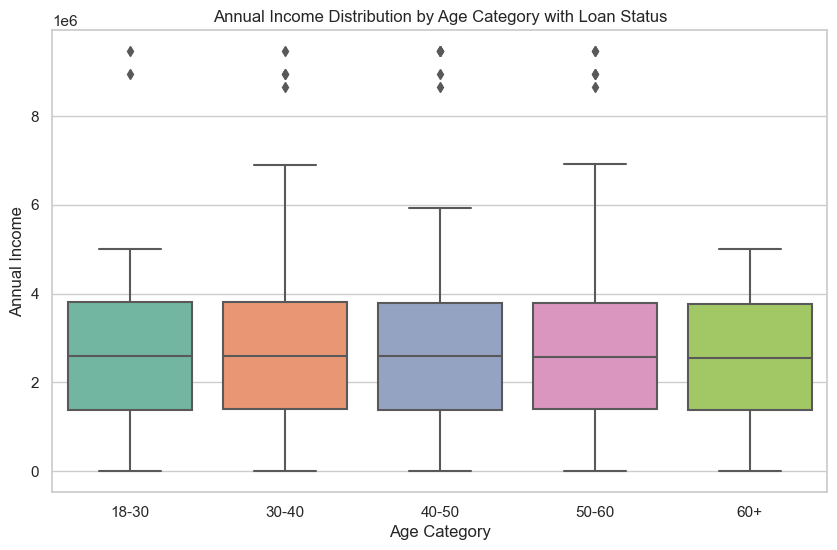

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_category', y='Annual Income', data=df, palette='Set2')
plt.title('Annual Income Distribution by Age Category with Loan Status')
plt.xlabel('Age Category')
plt.ylabel('Annual Income')
plt.show()


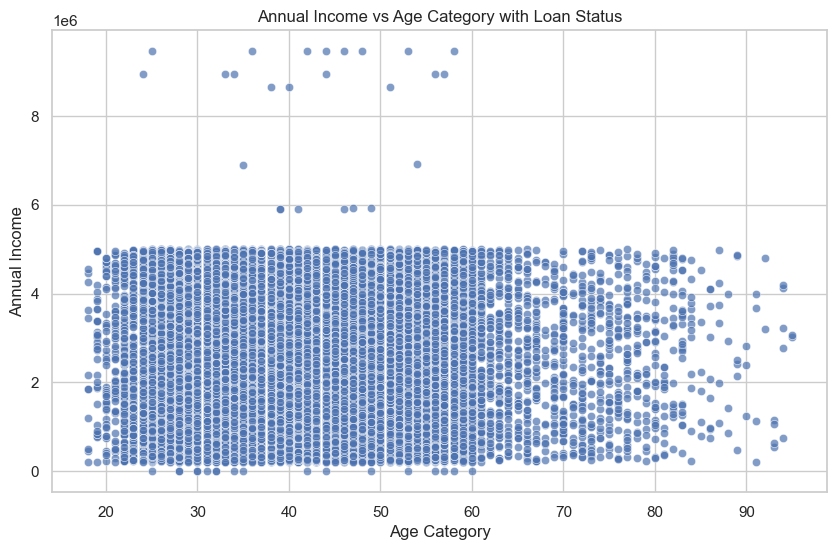

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Annual Income', data=df, palette='Set2', alpha=0.7)
plt.title('Annual Income vs Age Category with Loan Status')
plt.xlabel('Age Category')
plt.ylabel('Annual Income')
plt.show()


We can see that density of the annual income is same across all the ages. Only some people in 20 to 60 gets significantly higher salary than rest

In [101]:
df =df.drop(['age_category'],axis=1)

# Feature Engineering

In [102]:
df

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,no,2143,yes,no,cellular,261,1,1,0,unknown,0,351,58,management,married,tertiary,839368,M
1,no,29,yes,no,cellular,151,1,1,0,unknown,0,326,44,technician,single,secondary,1452858,M
2,no,2,yes,yes,cellular,76,1,1,0,unknown,0,422,33,entrepreneur,married,secondary,4851383,F
3,no,1506,yes,no,cellular,92,1,1,0,unknown,0,113,47,blue-collar,married,secondary,3207754,F
4,no,1,no,no,cellular,198,1,1,0,unknown,0,342,33,blue-collar,single,secondary,2562322,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,no,825,no,no,cellular,0,0,1,0,unknown,1,152,51,technician,married,tertiary,2229818,M
45207,no,1729,no,no,cellular,0,0,1,0,unknown,1,334,94,retired,divorced,primary,2783556,M
45208,no,3383,no,no,cellular,643,5,1,0,success,1,381,72,retired,married,secondary,443512,M
45209,no,668,no,no,telephone,0,0,1,0,unknown,0,211,57,blue-collar,married,secondary,4193684,F


# Predictive Model Building:
Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present the model's performance metrics on both the train and test datasets.


In [103]:
df.isnull().sum()

Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
age                 0
job                 0
marital             0
education           0
Annual Income       0
Gender              0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45203 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Insurance         45203 non-null  object 
 1   balance           45203 non-null  int32  
 2   housing           45203 non-null  object 
 3   loan              45203 non-null  object 
 4   contact           45203 non-null  object 
 5   duration          45203 non-null  float64
 6   campaign          45203 non-null  int64  
 7   last_contact_day  45203 non-null  float64
 8   previous          45203 non-null  float64
 9   poutcome          45203 non-null  object 
 10  Term Deposit      45203 non-null  int64  
 11  Count_Txn         45203 non-null  float64
 12  age               45203 non-null  int64  
 13  job               45203 non-null  object 
 14  marital           45203 non-null  object 
 15  education         45203 non-null  object 
 16  Annual Income     45203 non-null  int32 

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['balance', 'duration', 'previous', 'Count_Txn', 'Annual Income']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [106]:
df

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,no,1,yes,no,cellular,0,1,1,0,unknown,0,0,58,management,married,tertiary,-1,M
1,no,-1,yes,no,cellular,-0,1,1,0,unknown,0,0,44,technician,single,secondary,-1,M
2,no,-1,yes,yes,cellular,-1,1,1,0,unknown,0,1,33,entrepreneur,married,secondary,2,F
3,no,0,yes,no,cellular,-1,1,1,0,unknown,0,-2,47,blue-collar,married,secondary,0,F
4,no,-1,no,no,cellular,-0,1,1,0,unknown,0,0,33,blue-collar,single,secondary,-0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,no,-0,no,no,cellular,-1,0,1,0,unknown,1,-1,51,technician,married,tertiary,-0,M
45207,no,1,no,no,cellular,-1,0,1,0,unknown,1,0,94,retired,divorced,primary,0,M
45208,no,2,no,no,cellular,2,5,1,0,success,1,1,72,retired,married,secondary,-2,M
45209,no,-0,no,no,telephone,-1,0,1,0,unknown,0,-1,57,blue-collar,married,secondary,1,F


In [107]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
categorical_features = ['campaign','age']
df[categorical_features] = minmax_scaler.fit_transform(df[categorical_features])


In [108]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_features = ['job', 'marital', 'education', 'poutcome','contact','last_contact_day']

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


In [109]:
df = pd.get_dummies(df, columns=['housing', 'loan','Gender','Insurance'], drop_first=True)

In [110]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Features (X) and Target Variable (y)
X = df.drop('Term Deposit', axis=1)  # Features (exclude the target variable)
y = df['Term Deposit']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36162, 17)
X_test shape: (9041, 17)
y_train shape: (36162,)
y_test shape: (9041,)


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

def classification_metrics_all_models(X, y, test_size=0.2, random_state=42):
    """
    Evaluate multiple classification algorithms using various metrics.

    Parameters:
    - X: Features.
    - y: Target variable.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Seed for random number generation.

    Returns:
    - metrics_dict: A dictionary containing metrics for each classifier.
    """

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define a list of classifiers
    classifiers = [
        RandomForestClassifier(),
        LogisticRegression(),
        KNeighborsClassifier(),
        SVC(),
        DecisionTreeClassifier(),
        GaussianNB()
    ]

    # Dictionary to store metrics for each classifier
    metrics_dict = {}

    for classifier in classifiers:
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store metrics in the dictionary
        metrics_dict[type(classifier).__name__] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix
        }

    return metrics_dict


metrics = classification_metrics_all_models(X, y)

# Print the metrics for each classifier
for classifier, metrics in metrics.items():
     print(f"\nMetrics for {classifier}:")
     for metric, value in metrics.items():
            print(f"{metric}: {value}")


Metrics for RandomForestClassifier:
Accuracy: 0.8917155181948899
Precision: 0.6070110701107011
Recall: 0.3004566210045662
F1 Score: 0.401954795357361
Confusion Matrix: [[7733  213]
 [ 766  329]]

Metrics for LogisticRegression:
Accuracy: 0.8803229731224422
Precision: 0.5154394299287411
Recall: 0.19817351598173516
F1 Score: 0.28627968337730875
Confusion Matrix: [[7742  204]
 [ 878  217]]

Metrics for KNeighborsClassifier:
Accuracy: 0.8812078309921468
Precision: 0.519774011299435
Recall: 0.25205479452054796
F1 Score: 0.3394833948339484
Confusion Matrix: [[7691  255]
 [ 819  276]]

Metrics for SVC:
Accuracy: 0.8789956863178852
Precision: 0.6666666666666666
Recall: 0.0018264840182648401
F1 Score: 0.0036429872495446266
Confusion Matrix: [[7945    1]
 [1093    2]]

Metrics for DecisionTreeClassifier:
Accuracy: 0.8518969140581794
Precision: 0.39126559714795006
Recall: 0.4009132420091324
F1 Score: 0.39603067207938647
Confusion Matrix: [[7263  683]
 [ 656  439]]

Metrics for GaussianNB:
Accura

In [112]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf_classifier = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

# best_rf_model = RandomForestClassifier(**best_params)
# best_rf_model.fit(X_train, y_train)

# y_pred = best_rf_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)

# print("Best Hyperparameters:", best_params)
# print("Accuracy on Test Set:", accuracy)

In [117]:
import pickle
with open(r"C:\Users\amirt\OneDrive\Documents\Projects\Marketing\scaler.pkl",'wb') as f:
    pickle.dump(scaler, f)
# with open('file/path/scaler.pkl','rb') as f:
#     sc = pickle.load(f)

In [118]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
with open(r"C:\Users\amirt\OneDrive\Documents\Projects\Marketing\model.pkl",'wb') as f:
    pickle.dump(rf, f)